# This is a bench mark data visualization

In [1]:
!pip install matplotlib
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


this is the function we need to visualize the data

In [3]:
def display_result(file_path):
    BBA0_count = 0
    Bola_count = 0
    LOLP_count = 0
    with open(file_path, "r") as f:
        lines = f.readlines()
        pass
    for line in lines:
        abr_name = line.replace("\n", "").split(" ")[-1]
        if abr_name == "BBA0":
            BBA0_count += 1
            pass
        elif abr_name == "Bola":
            Bola_count += 1
            pass
        else:
            LOLP_count += 1
            pass
        pass
    plt.xlabel("ABR Algorithm")
    plt.ylabel("times of zero buffer length")
    plt.title("ABR peformance comparison")
    plt.bar(
        ["BBA0", "Bola", "LOLP"],
        [BBA0_count, Bola_count, LOLP_count]
    )
    plt.show()
    pass

\*下面的分组实验每组之间测试时长不完全相同，但都足够长，能够较为准确地体现三种算法之间的表现差异。

This is the first try with following parameters:

- `reservoir = 2`
- `cushion = 8`

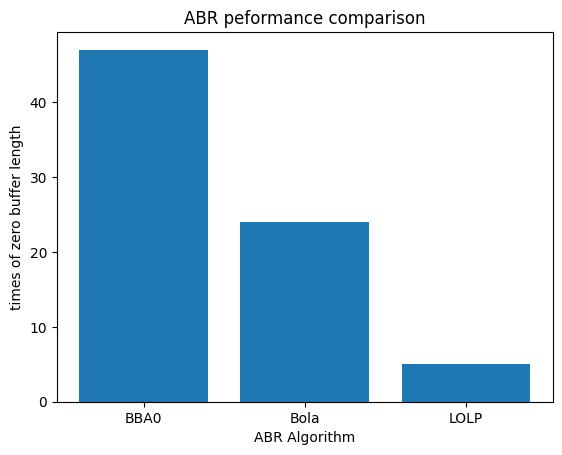

In [4]:
file_path = "/content/drive/MyDrive/datasets/log1.txt"
display_result(file_path)

The result is bad, let's try to improve our BBA0.

This is the result with:

- `reservoir = 5`
- `cushion = 8`

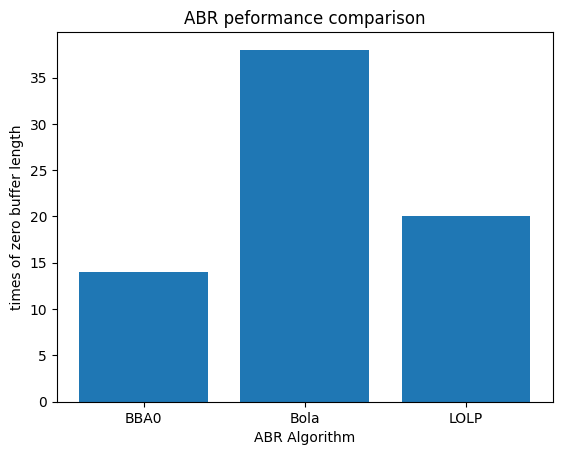

In [5]:
file_path = "/content/drive/MyDrive/datasets/log2.txt"
display_result(file_path)

可以得出：极端情况下（网络波动幅度大且最坏情况带宽低）设定较大的 reservoir 可以显著减少视频播放过程中的卡顿，达到一个比 Bola 和LOLP 算法更优秀的结果。

Next, let's investigate how the cushion effects performance.

This is the result with:

- `reservoir = 5`
- `cushion = 3`

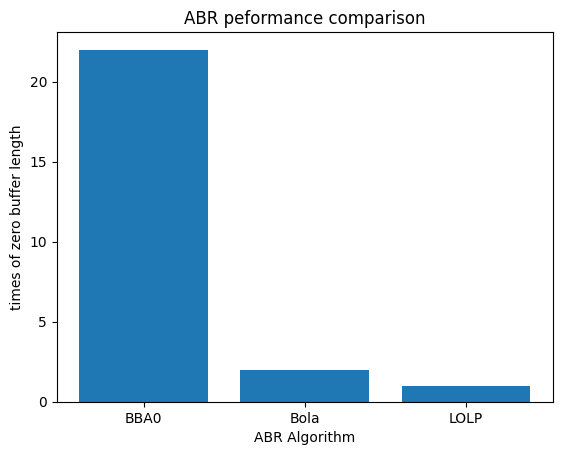

In [6]:
file_path = "/content/drive/MyDrive/datasets/log3.txt"
display_result(file_path)

显然，过小的 cushion 使算法效果变差了。
原因是播放器在 buffer 还比较短的时候就开始请求高码率视频，
使得 buffer 迅速耗尽，播放过程中 buffer 长度呈锯齿状。

![BBA0 run](https://drive.google.com/uc?export=view&id=1FNhzTBUV8q7C1khkN7oxTi0AILpV6Xe-)


## 结论

若要减小 BBA0 算法下的卡顿次数，应适当增大 reservoir 与 cushion。
但过大的 reservoir 与 cushion 也可能导致不必要的底码率播放。